In [16]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
telco_base_data = pd.read_csv('Telco-Customer-Churn.csv')

In [18]:
telco_base_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [19]:
telco_base_data.shape

(7043, 21)

In [5]:
for i in telco_base_data.columns:
    print(f"Unique {i}'s count: {telco_base_data[i].nunique()}")
    print(f"{telco_base_data[i].unique()}\n")

Unique customerID's count: 7043
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

Unique gender's count: 2
['Female' 'Male']

Unique SeniorCitizen's count: 2
[0 1]

Unique Partner's count: 2
['Yes' 'No']

Unique Dependents's count: 2
['No' 'Yes']

Unique tenure's count: 73
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

Unique PhoneService's count: 2
['No' 'Yes']

Unique MultipleLines's count: 3
['No phone service' 'No' 'Yes']

Unique InternetService's count: 3
['DSL' 'Fiber optic' 'No']

Unique OnlineSecurity's count: 3
['No' 'Yes' 'No internet service']

Unique OnlineBackup's count: 3
['Yes' 'No' 'No internet service']

Unique DeviceProtection's count: 3
['No' 'Yes' 'No internet service']

Unique TechSupport's count: 3
['No' 'Yes' 'No internet service']

Unique StreamingTV's

In [6]:
telco_base_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
telco_base_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


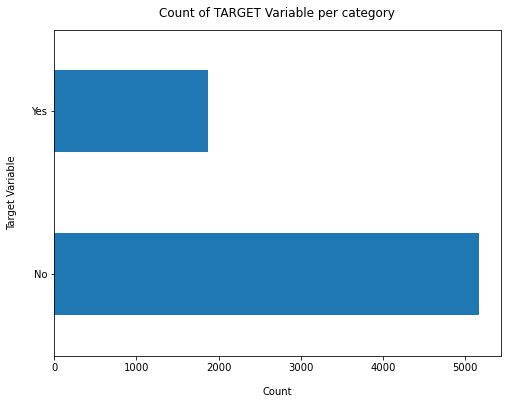

In [8]:
telco_base_data['Churn'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

In [9]:
100*telco_base_data['Churn'].value_counts()/len(telco_base_data['Churn'])

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

In [10]:
telco_base_data.info(verbose = True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


C:\Users\naina\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


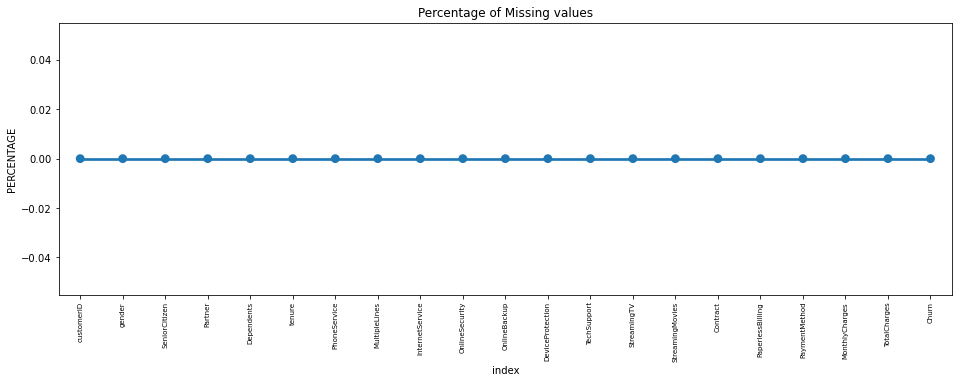

In [11]:
missing = pd.DataFrame((telco_base_data.isnull().sum())*100/telco_base_data.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [12]:
telco_data = telco_base_data.copy()

In [13]:
telco_data.TotalCharges = pd.to_numeric(telco_data.TotalCharges, errors='coerce')
telco_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [14]:
telco_data.loc[telco_data ['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [15]:
#Removing missing values 
telco_data.dropna(how = 'any', inplace = True)
telco_data
#telco_data.fillna(0)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [17]:
new_df1_target0=telco_data.loc[telco_data["Churn"]=='Yes']
new_df1_target1=telco_data.loc[telco_data["Churn"]=='No']

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

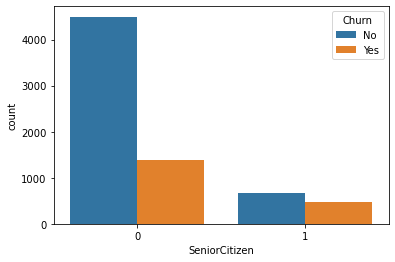

In [18]:
sns.countplot(data=telco_data, x='SeniorCitizen', hue='Churn')

<AxesSubplot:xlabel='Partner', ylabel='count'>

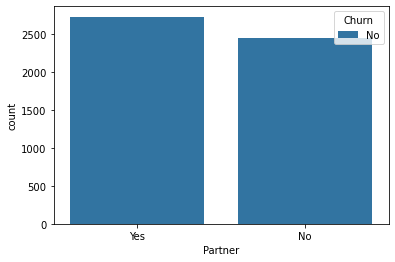

In [19]:
sns.countplot(data=new_df1_target1, x='Partner', hue='Churn')

<AxesSubplot:xlabel='Partner', ylabel='count'>

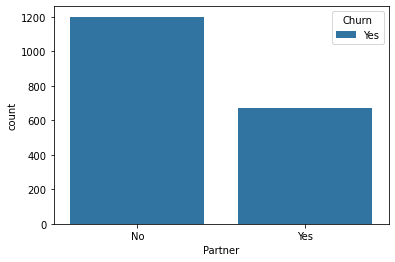

In [20]:
sns.countplot(data=new_df1_target0, x='Partner', hue='Churn')

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

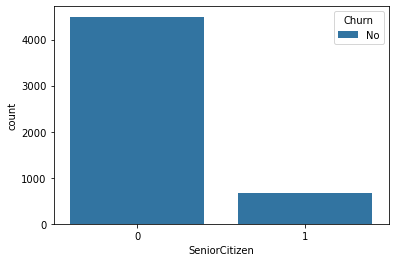

In [21]:
sns.countplot(data=new_df1_target1, x='SeniorCitizen', hue='Churn')

In [ ]:
# #drop column customerID and tenure
# #We do not need customer ID in our analysis as it does not help us predict whether the cutomer will churn or not also, it increases the dimensionality.
# telco_data.drop(columns= ['customerID','tenure'], axis=1, inplace=True)
# telco_data.head()

### OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies

In [23]:
def stacked_plot(df, group, target):
    """
    Function to generate a stacked plots between two variables
    """
    fig, ax = plt.subplots(figsize = (6,4))
    temp_df = (df.groupby([group, target]).size()/df.groupby(group)[target].count()).reset_index().pivot(columns=target, index=group, values=0)
    temp_df.plot(kind='bar', stacked=True, ax = ax, color = ["green", "brown"])
    ax.xaxis.set_tick_params(rotation=0)
    ax.set_xlabel(group)
    ax.set_ylabel('Churn Percentage')

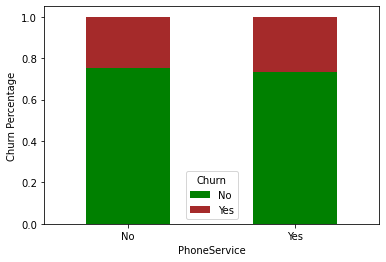

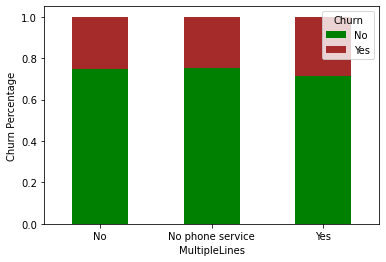

In [24]:
stacked_plot(telco_data, "PhoneService", "Churn")
stacked_plot(telco_data, "MultipleLines", "Churn")

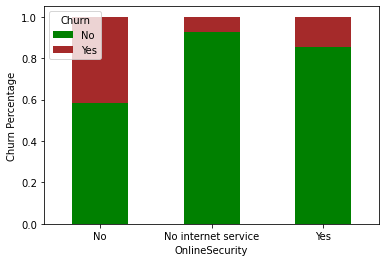

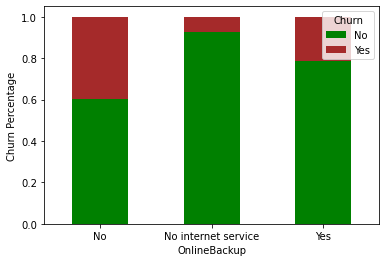

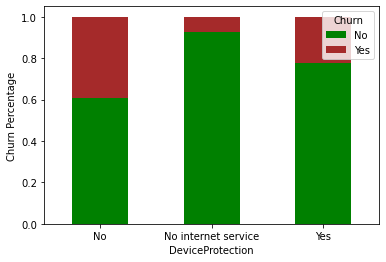

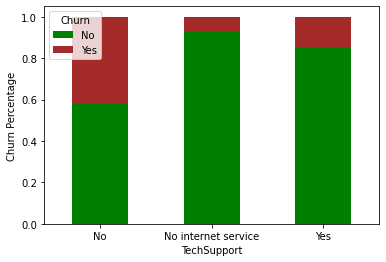

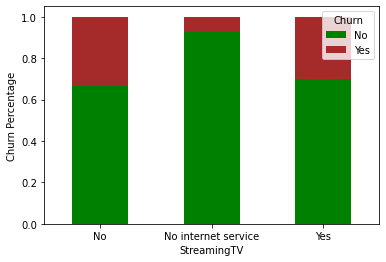

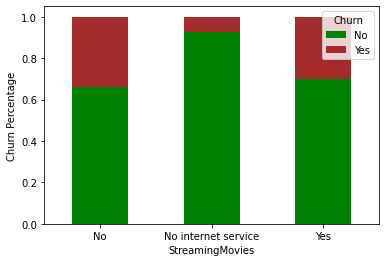

In [25]:
stacked_plot(telco_data, "OnlineSecurity", "Churn")
stacked_plot(telco_data, "OnlineBackup", "Churn")
stacked_plot(telco_data, "DeviceProtection", "Churn")
stacked_plot(telco_data, "TechSupport", "Churn")
stacked_plot(telco_data, "StreamingTV", "Churn")
stacked_plot(telco_data, "StreamingMovies", "Churn")

As we can see, when the customers are new they do not opt for various services and their churning rate is very high.

### InternetService

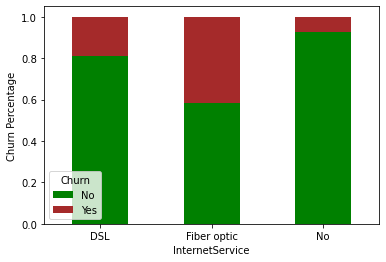

In [26]:
stacked_plot(telco_data, "InternetService", "Churn")

When the internet service is Fiber Optic, the churn rate is very high. Fiber Optics provides highr speed compared to DSL. The reason might be the higher cost of fiber optics.

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

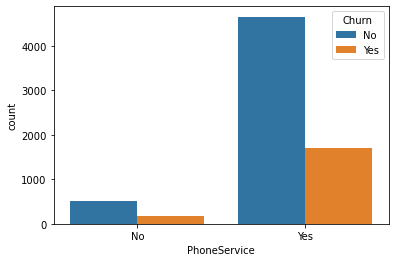

In [22]:
sns.countplot(data=telco_data, x="PhoneService", hue="Churn")


### Contract

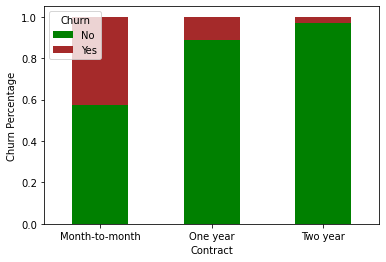

In [27]:
stacked_plot(telco_data, "Contract", "Churn")

In the case of Month-to-month contract Churn rate is very high. There is also a posibility of having customers in the dataframe who are still in their two-year or one-year contract plan.



C:\Users\naina\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='InternetService', ylabel='count'>

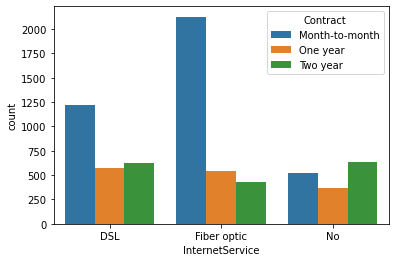

In [28]:
sns.countplot(telco_data.InternetService, hue = telco_data.Contract)

Many of the people of who opt for month-to-month Contract choose Fiber optic as Internet service and this is the reason for higher churn rate for fiber optic Internet service type.

### PaymentMethod

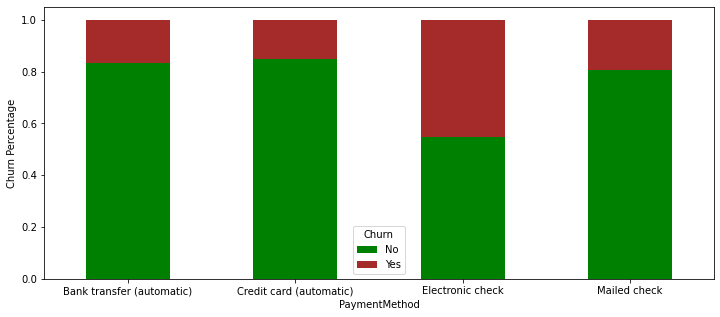

In [29]:
group = "PaymentMethod"
target = "Churn"
fig, ax = plt.subplots(figsize = (12,5))
temp_df = (telco_data.groupby([group, target]).size()/telco_data.groupby(group)[target].count()).reset_index().pivot(columns=target, index=group, values=0)
temp_df.plot(kind='bar', stacked=True, ax = ax, color = ["green", "brown"])
ax.xaxis.set_tick_params(rotation=0)
ax.set_xlabel(group)
ax.set_ylabel('Churn Percentage');

In the case of Electronic check, churn is very high.

C:\Users\naina\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

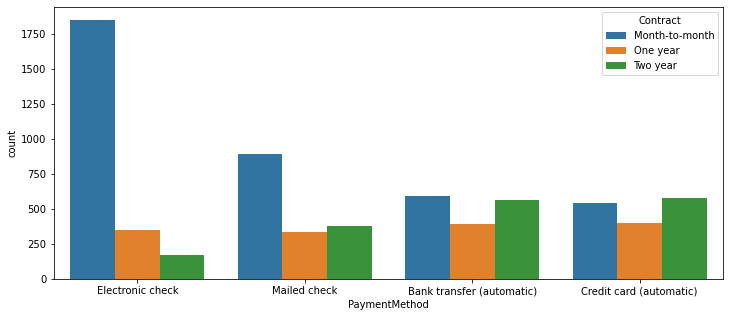

In [30]:
fig, ax = plt.subplots(figsize = (12,5))
sns.countplot(telco_data.PaymentMethod, hue = telco_data.Contract, ax = ax)

### PaperlessBilling

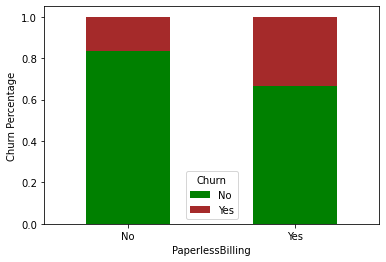

In [31]:
stacked_plot(telco_data, "PaperlessBilling", "Churn")

### TotalCharges and Monthly Charges

In [32]:
telco_data.TotalCharges.describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

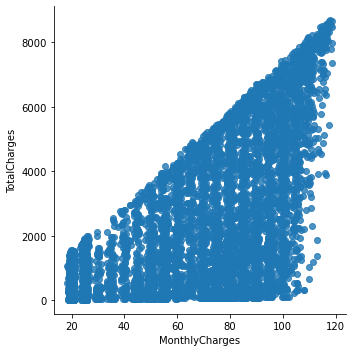

In [33]:
sns.lmplot(data=telco_data, x='MonthlyCharges', y='TotalCharges', fit_reg=False)



Total Charges increase as Monthly Charges increase

Text(0.5, 1.0, 'Monthly charges by churn')

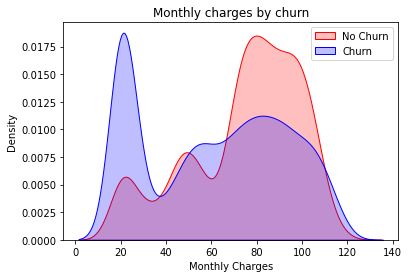

In [34]:
Mth = sns.kdeplot(telco_data.MonthlyCharges[(telco_data["Churn"] == 'Yes') ],
                color="Red", shade = True)
Mth = sns.kdeplot(telco_data.MonthlyCharges[(telco_data["Churn"] == 'No') ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

Text(0.5, 1.0, 'Total charges by churn')

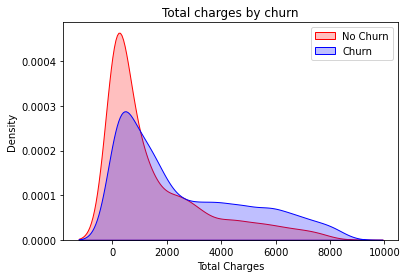

In [35]:
Tot = sns.kdeplot(telco_data.TotalCharges[(telco_data["Churn"] == 'Yes') ],
                color="Red", shade = True)
Tot = sns.kdeplot(telco_data.TotalCharges[(telco_data["Churn"] == 'No') ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')

1. Churn is high when Monthly Charges ar high
2. higher Churn at lower Total Charges

### Tenure

In [36]:
print(telco_data['tenure'].max())

72


In [37]:
telco_data['tenure'].value_counts().head(10)

1     613
72    362
2     238
3     200
4     176
71    170
5     133
7     131
8     123
70    119
Name: tenure, dtype: int64

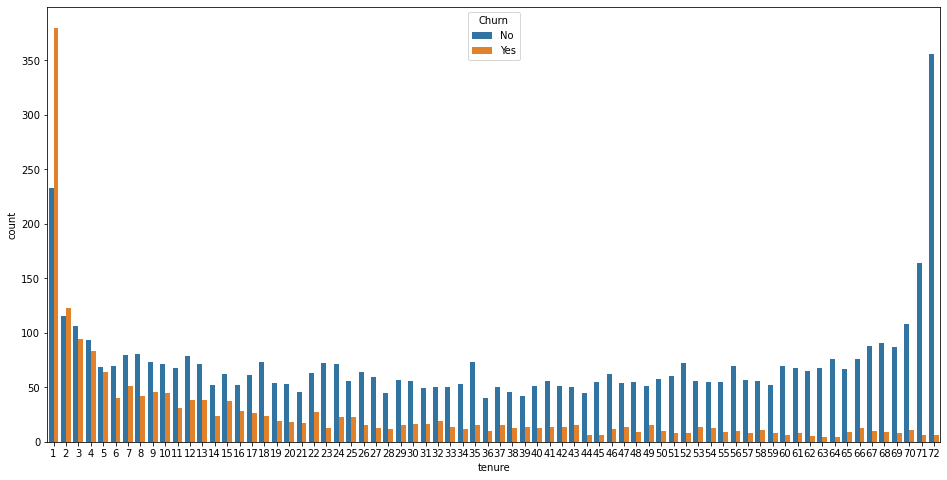

In [38]:
plt.figure(figsize=(16,8))
sns.countplot(x="tenure", hue="Churn", data=telco_data)
plt.show()

In [ ]:
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

telco_data['tenure_group'] = pd.cut(telco_data.tenure, range(1, 80, 12), right=False, labels=labels)

In [ ]:
telco_data['tenure_group'].value_counts()

In [ ]:
sns.countplot(x="tenure_group", hue="Churn", data=telco_data)

In [72]:
#check of outliers by applying 1QR method
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
df_nums = telco_data[numerical_features]
telco_data.describe()
Q1 = df_nums.quantile(0.25)
Q3 = df_nums.quantile(0.75)
IQR = Q3 - Q1
IQR
((df_nums< (Q1 - 1.5 * IQR)) | (df_nums> (Q3 + 1.5 * IQR))).any()

tenure            False
MonthlyCharges    False
TotalCharges      False
dtype: bool

No outliers in numerical features detected with the IQR method — no adjustments made.

### Feature Engineering

In [20]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

In [21]:
df = telco_data.drop(columns='customerID')

In [22]:
df['Number_AdditionalServices'] = (df[['OnlineSecurity', 'DeviceProtection', 'StreamingTV', 'StreamingMovies', 'TechSupport','OnlineBackup']]=='Yes').sum(axis=1)

In [23]:
df.info(verbose = True) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   gender                     7032 non-null   object 
 1   SeniorCitizen              7032 non-null   int64  
 2   Partner                    7032 non-null   object 
 3   Dependents                 7032 non-null   object 
 4   tenure                     7032 non-null   int64  
 5   PhoneService               7032 non-null   object 
 6   MultipleLines              7032 non-null   object 
 7   InternetService            7032 non-null   object 
 8   OnlineSecurity             7032 non-null   object 
 9   OnlineBackup               7032 non-null   object 
 10  DeviceProtection           7032 non-null   object 
 11  TechSupport                7032 non-null   object 
 12  StreamingTV                7032 non-null   object 
 13  StreamingMovies            7032 non-null   objec

<AxesSubplot:xlabel='Number_AdditionalServices', ylabel='count'>

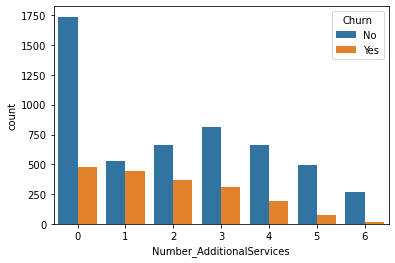

In [24]:
#Countplot for new feature
#sns.countplot(telco_data.InternetService, hue = telco_data.Contract)
sns.countplot(data=df, x="Number_AdditionalServices", hue="Churn")
# sns.countplot(df.Number_AdditionalServices,hue = 'Churn')

In [25]:
label_encoding = preprocessing.LabelEncoder()

In [26]:
#Label Encoding 
le_features = ['gender', 'Partner', 'Dependents', 'Churn', 'PhoneService', 'PaperlessBilling']
def label_encoding(features, df):
    for i in features:
        df[i] = df[i].map({'Yes':1, 'No':0})
    return
label_encoding(['Partner', 'Dependents', 'Churn', 'PhoneService', 'PaperlessBilling'], df)
df['gender'] = df['gender'].map({'Female':1, 'Male':0})        
        
        

In [27]:
#One-hot encoding for columns
ohe_features = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod', 'Number_AdditionalServices', 'OnlineBackup']
df = pd.get_dummies(df, columns=ohe_features)

In [28]:
#feature scaling: min-max-scaling
mms_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
df_features_mms = pd.DataFrame(df, columns=mms_features)
df_remaining_features = df.drop(columns=mms_features)
mms = MinMaxScaler()
rescaled_features = mms.fit_transform(df_features_mms)
df_rescaled_features = pd.DataFrame(rescaled_features, columns=mms_features, index=df_remaining_features.index)
df = pd.concat([df_remaining_features, df_rescaled_features], axis=1)

<AxesSubplot:>

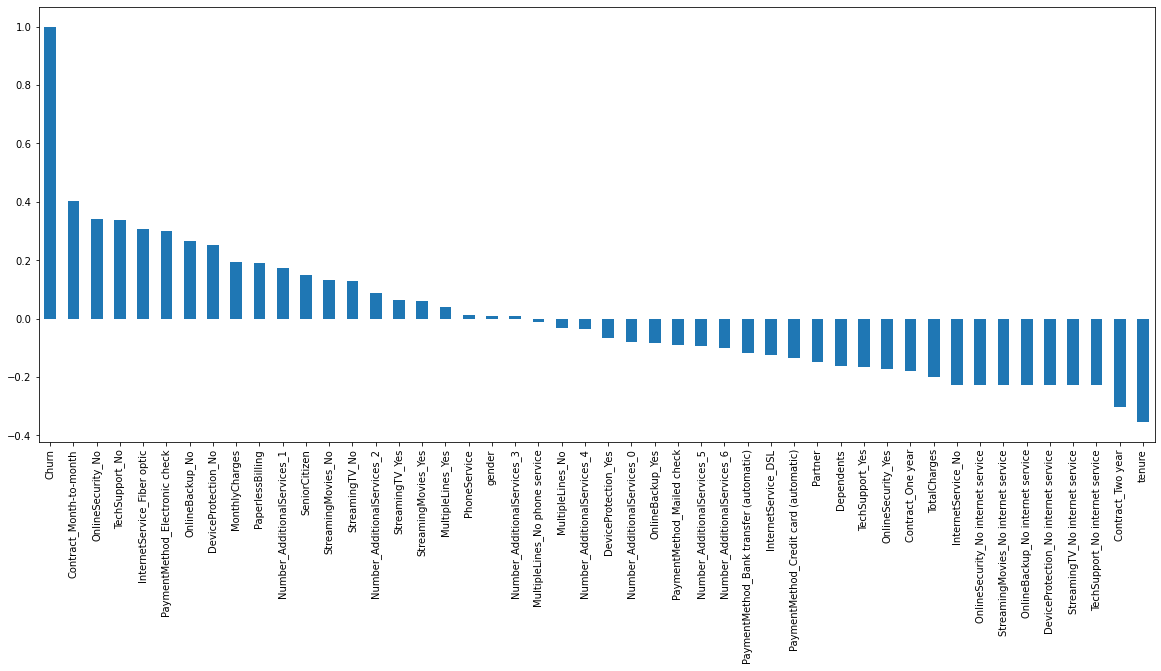

In [29]:
plt.figure(figsize=(20,8))
df.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

<AxesSubplot:>

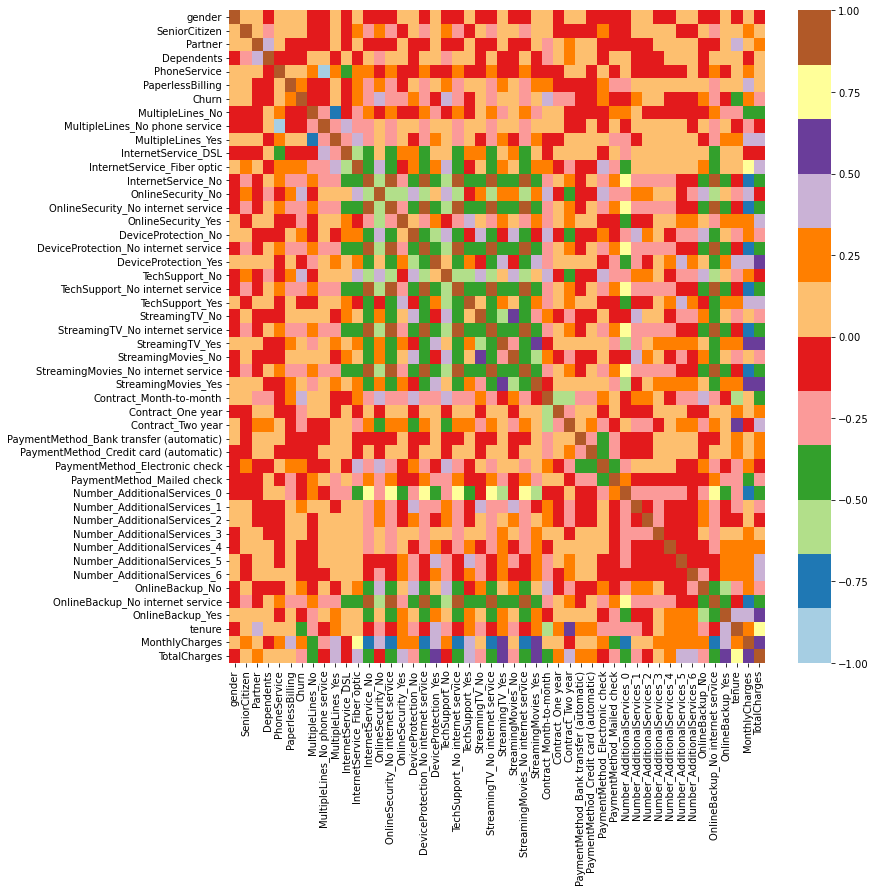

In [30]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), cmap="Paired")

In [31]:
df.to_csv('tel_churn.csv')

In [32]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,...,Number_AdditionalServices_3,Number_AdditionalServices_4,Number_AdditionalServices_5,Number_AdditionalServices_6,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,tenure,MonthlyCharges,TotalCharges
0,1,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0.000000,0.115423,0.001275
1,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0.464789,0.385075,0.215867
2,0,0,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,1,0.014085,0.354229,0.010310
3,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0.619718,0.239303,0.210241
4,1,0,0,0,1,1,1,1,0,0,...,0,0,0,0,1,0,0,0.014085,0.521891,0.015330


In [33]:
telco_data['Number_AdditionalServices'] = (telco_data[['OnlineSecurity', 'DeviceProtection', 'StreamingTV', 'StreamingMovies', 'TechSupport','OnlineBackup']]=='Yes').sum(axis=1)

In [34]:
telco_data.info(verbose = True) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7032 non-null   object 
 1   gender                     7032 non-null   object 
 2   SeniorCitizen              7032 non-null   int64  
 3   Partner                    7032 non-null   object 
 4   Dependents                 7032 non-null   object 
 5   tenure                     7032 non-null   int64  
 6   PhoneService               7032 non-null   object 
 7   MultipleLines              7032 non-null   object 
 8   InternetService            7032 non-null   object 
 9   OnlineSecurity             7032 non-null   object 
 10  OnlineBackup               7032 non-null   object 
 11  DeviceProtection           7032 non-null   object 
 12  TechSupport                7032 non-null   object 
 13  StreamingTV                7032 non-null   objec

<AxesSubplot:xlabel='Number_AdditionalServices', ylabel='count'>

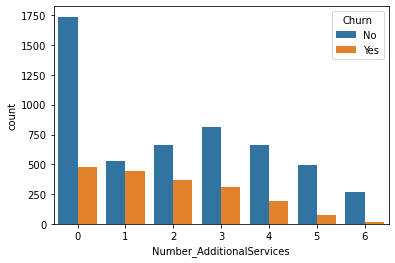

In [35]:
sns.countplot(data=telco_data, x="Number_AdditionalServices", hue="Churn")

In [36]:
le_features = ['gender', 'Partner', 'Dependents', 'Churn', 'PhoneService', 'PaperlessBilling']
def label_encoding(features, telco_data):
    for i in features:
        telco_data[i] = telco_data[i].map({'Yes':1, 'No':0})
    return
label_encoding(['Partner', 'Dependents', 'Churn', 'PhoneService', 'PaperlessBilling'], telco_data)
telco_data['gender'] = telco_data['gender'].map({'Female':1, 'Male':0})        
        
        

In [37]:
ohe_features = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod', 'Number_AdditionalServices', 'OnlineBackup']
telco_data = pd.get_dummies(telco_data, columns=ohe_features)

In [38]:
#feature scaling: min-max-scaling
mms_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
df_features_mms = pd.DataFrame(telco_data, columns=mms_features)
df_remaining_features = telco_data.drop(columns=mms_features)
mms = MinMaxScaler()
rescaled_features = mms.fit_transform(df_features_mms)
df_rescaled_features = pd.DataFrame(rescaled_features, columns=mms_features, index=df_remaining_features.index)
telco_data = pd.concat([df_remaining_features, df_rescaled_features], axis=1)

In [42]:
telco_data.to_csv('tel_churn_with_id.csv')

In [41]:
telco_data

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,...,Number_AdditionalServices_3,Number_AdditionalServices_4,Number_AdditionalServices_5,Number_AdditionalServices_6,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,tenure,MonthlyCharges,TotalCharges
0,7590-VHVEG,1,0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0.000000,0.115423,0.001275
1,5575-GNVDE,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0.464789,0.385075,0.215867
2,3668-QPYBK,0,0,0,0,1,1,1,1,0,...,0,0,0,0,0,0,1,0.014085,0.354229,0.010310
3,7795-CFOCW,0,0,0,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0.619718,0.239303,0.210241
4,9237-HQITU,1,0,0,0,1,1,1,1,0,...,0,0,0,0,1,0,0,0.014085,0.521891,0.015330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,0,1,1,1,1,0,0,0,...,0,0,1,0,1,0,0,0.323944,0.662189,0.227521
7039,2234-XADUH,1,0,1,1,1,1,0,0,0,...,0,1,0,0,0,0,1,1.000000,0.845274,0.847461
7040,4801-JZAZL,1,0,1,1,0,1,0,0,1,...,0,0,0,0,1,0,0,0.140845,0.112935,0.037809
7041,8361-LTMKD,0,1,1,0,1,1,1,0,0,...,0,0,0,0,1,0,0,0.042254,0.558706,0.033210
